In [2]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

##### Import Shapefiles

In [70]:
#import county shapefiles
counties = "..\\Data\\county_shape_files\\cb_2018_us_county_20m.zip"
counties = gpd.read_file(counties)

In [8]:
#import 20 min walk shapefiles
walk_20_path = "..\\Data\\VaccineAccessShapefiles\\20_min_walk_polys.zip"
walk20 = gpd.read_file(walk_20_path)

In [9]:
#import 10 minute drive shapefiles
drive_10_path = "..\\Data\\VaccineAccessShapefiles\\10_min_drive_polys.zip"
drive10 = gpd.read_file(drive_10_path)

In [26]:
#import dot density map
dotdata = "..\\Data\\dot_map.zip"
racial_data = gpd.read_file(dotdata)

#update projection
racial_data = racial_data.set_crs('EPSG:3857')
racial_data = racial_data.to_crs(walk20.crs)

#### Sanity check plots

<AxesSubplot:>

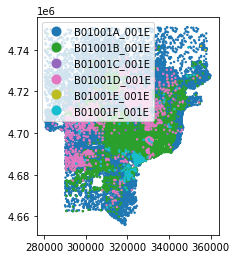

In [27]:
racial_data.plot(markersize=2, column='field', categorical=True, legend=True)

In [74]:
counties[counties['GEOID'] == 26163]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry


<AxesSubplot:>

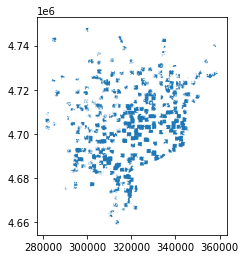

In [11]:
drive10.plot()

#### Run spatial dissolve

,geometry,FID
0,"MULTIPOLYGON (((290160.696 4674583.450, 290158...",0


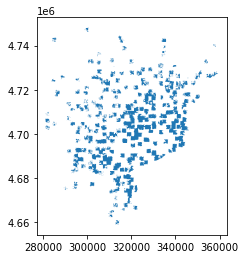

In [14]:
drive10_dis =drive10.dissolve()

drive10_dis.plot()
drive10_dis

,geometry,FID
0,"MULTIPOLYGON (((289925.164 4674726.166, 289922...",0


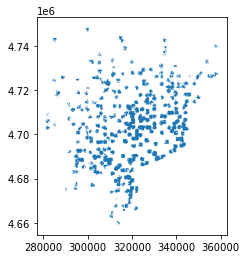

In [15]:
walk20_dis = walk20.dissolve()

walk20_dis.plot()
walk20_dis

#### Clip data by vaccine access

In [28]:
walk20_clip = gpd.clip(racial_data, walk20_dis)

<AxesSubplot:>

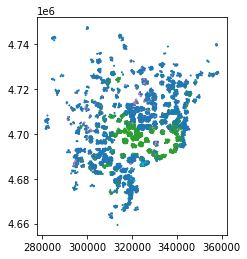

In [33]:
walk20_clip.plot(markersize=1, column='field', categorical=True)

In [34]:
drive10_clip = gpd.clip(racial_data, drive10_dis)

<AxesSubplot:>

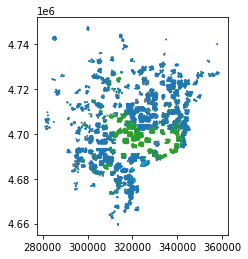

In [35]:
drive10_clip.plot(markersize=1, column='field', categorical=True)

In [47]:
walk20_clip

,level_0,level_1,field,white,black,AI_AK,asian,NH_PI,other,geometry
12906,724,33,B01001A_001E,1,0,0,0,0,0,POINT (336041.350 4739034.220)
12239,711,56,B01001A_001E,1,0,0,0,0,0,POINT (339237.747 4730504.629)
12235,711,52,B01001A_001E,1,0,0,0,0,0,POINT (339765.286 4730576.397)
12241,711,58,B01001A_001E,1,0,0,0,0,0,POINT (339847.558 4730608.478)
12322,711,139,B01001A_001E,1,0,0,0,0,0,POINT (339775.057 4730638.561)
...,...,...,...,...,...,...,...,...,...,...
24751,1141,2,B01001A_001E,1,0,0,0,0,0,POINT (305800.049 4711495.058)
24767,1141,18,B01001A_001E,1,0,0,0,0,0,POINT (305948.296 4711570.146)
22559,1063,10,B01001A_001E,1,0,0,0,0,0,POINT (306205.335 4711629.971)
24760,1141,11,B01001A_001E,1,0,0,0,0,0,POINT (304845.499 4711930.128)


#### Counts!!

In [55]:
#TOTAL racial demographics
races = racial_data.groupby('field').agg(['count'])
races

,level_0,level_1,white,black,AI_AK,asian,NH_PI,other,geometry
,count,count,count,count,count,count,count,count,count
field,,,,,,,,,
B01001A_001E,25239,25239,25239,25239,25239,25239,25239,25239,25239
B01001B_001E,8997,8997,8997,8997,8997,8997,8997,8997,8997
B01001C_001E,25,25,25,25,25,25,25,25,25
B01001D_001E,1531,1531,1531,1531,1531,1531,1531,1531,1531
B01001E_001E,3,3,3,3,3,3,3,3,3
B01001F_001E,284,284,284,284,284,284,284,284,284


In [58]:
total_pop = 25239 + 8997 + 25 + 1531 + 3 + 284

In [59]:
25239/total_pop

0.699548213642285

In [61]:
8997/total_pop

0.24936943928601124

In [48]:
walk_count = walk20_clip.groupby('field').agg(['count'])
walk_count

,level_0,level_1,white,black,AI_AK,asian,NH_PI,other,geometry
,count,count,count,count,count,count,count,count,count
field,,,,,,,,,
B01001A_001E,6779,6779,6779,6779,6779,6779,6779,6779,6779
B01001B_001E,2630,2630,2630,2630,2630,2630,2630,2630,2630
B01001C_001E,8,8,8,8,8,8,8,8,8
B01001D_001E,377,377,377,377,377,377,377,377,377
B01001E_001E,1,1,1,1,1,1,1,1,1
B01001F_001E,127,127,127,127,127,127,127,127,127


In [51]:
6779 + 2630 + 8 + 377 + 1 + 127

9922

In [52]:
6779/9922

0.6832291876637775

In [60]:
2630/9922

0.26506752670832495